# <center>🌎 ANALYSIS OF COVID-19  DATA</center>

The section consists of various section of geo analysis of data
## **Content**

1. [Data and library loading](#1)
2. [Visualizing and Understading of Data](#2)
3. [Preprocessing/Data Cleaning](#3)
4. [Data Viualization](#4)
    * [Valid Tweets](#5)
    * [Top 10 Countries with Most Tweets](#6)
    * [10 Countries with Least Tweets](#7)
    * [Top 15 Countries with Most Tweets Diffrent Representation](#8)
    * [Geo-MAP](#9)
10. [Conclusion](#10)

<a id="1"></a> <br>
# <div class="alert alert-block alert-info">Data and library loading</div>

In [1]:
#importing necessery libraries for future analysis of the dataset
!pip install calmap

from datetime import date
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import geoplot
from geopy import Nominatim
import folium
import mapclassify
import plotly.express as px 
import plotly.graph_objs as go 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from folium.plugins import HeatMapWithTime, TimestampedGeoJson
import matplotlib.style as style 
style.use('fivethirtyeight')
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
        
#Now Loading Tweetes Dataset 
covid_tweets_data = pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')

<a id="2"></a> <br>
# <div class="alert alert-block alert-info">Visualizing and Understading of Data</div>

These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples.

Content The tweets have #covid19 hashtag. Collection started on 25/7/2020, with an initial 17k batch and will continue on a daily basis.

* The collection script can be found here: https://github.com/gabrielpreda/covid-19-tweets

View Recentrly Imported Dataset

In [2]:
covid_tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


This Dataset Contains Following Columns and Datatypes

1. user_name         **(object)**
2. user_location     **(object)**
3. user_description  **(object)**
4. user_created      **(object)**
5. user_followers    **(int64)** 
6. user_friends      **(int64)** 
7. user_favourites   **(int64)** 
8. user_verified     **(bool)**  
9. date              **(object)**
10. text              **(object)**
11. hashtags          **(object)**
12. source            **(object)**
13. is_retweet        **(bool)**  

> dtypes: bool(2), int64(3), object(8)

In [3]:
nRow, nCol = covid_tweets_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 179108 rows and 13 columns


In [4]:
covid_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
covid_tweets_data.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


<a id="3"></a> <br>
# <div class="alert alert-block alert-info">Preprocessing/Data Cleaning</div>

In [6]:
# World City Dataset

cities = pd.read_csv('../input/world-cities-datasets/worldcities.csv')

In [7]:
## Duplicate Location in Tweets Dataset

covid_tweets_data["location"] = covid_tweets_data["user_location"]
covid_tweets_data["country"] = np.NaN


# Removing Mising Values

In [8]:
user_location = covid_tweets_data['location'].fillna(value='').str.split(',')

# Feature Engineering(Countries Where Users Tweet)

In [9]:
lat = cities['lat'].fillna(value = '').values.tolist()
lng = cities['lng'].fillna(value = '').values.tolist()
country = cities['country'].fillna(value = '').values.tolist()

# Getting all alpha 3 codes into  a list
world_city_iso3 = []
for c in cities['iso3'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso3:
        world_city_iso3.append(c)
        
# Getting all alpha 2 codes into  a list    
world_city_iso2 = []
for c in cities['iso2'].str.lower().str.strip().values.tolist():
    if c not in world_city_iso2:
        world_city_iso2.append(c)
        
# Getting all countries into  a list        
world_city_country = []
for c in cities['country'].str.lower().str.strip().values.tolist():
    if c not in world_city_country:
        world_city_country.append(c)

# Getting all amdin names into  a list
world_states = []
for c in cities['admin_name'].str.lower().str.strip().tolist():
    world_states.append(c)


# Getting all cities into  a list
world_city = cities['city'].fillna(value = '').str.lower().str.strip().values.tolist()



In [10]:

for each_loc in range(len(user_location)):
    ind = each_loc
    each_loc = user_location[each_loc]
    for each in each_loc:
        each = each.lower().strip()
        if each in world_city:
            order = world_city.index(each)
            covid_tweets_data['country'][ind] = country[order]
            continue
        if each in world_states:
            order= world_states.index(each)
            covid_tweets_data['country'][ind] = country[order]
            continue
        if each in world_city_country:
            order = world_city_country.index(each)
            covid_tweets_data['country'][ind] = world_city_country[order]
            continue
        if each in world_city_iso2:
            order = world_city_iso2.index(each)
            covid_tweets_data['country'][ind] = world_city_country[order]
            continue
        if each in world_city_iso3:
            order = world_city_iso3.index(each)
            covid_tweets_data['country'][ind] = world_city_country[order]
            continue


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1

<a id="4"></a> <br>
# <div class="alert alert-block alert-info">Data visualizations</div>

**<a id="5">Valid Tweets</a>**

In [11]:
print('Total Number of valid Tweets Available: ',covid_tweets_data['country'].isnull().sum())

Total Number of valid Tweets Available:  77910


## **<a id="6">Top 10 Countries with Most Tweets</a>**

                   Country  Tweet Count
0            united states        28875
1                    india        18430
2           united kingdom         9239
3                   canada         7566
4                australia         4115
..                     ...          ...
188              lithuania            1
189           cook islands            1
190  sao tome and principe            1
191           bahamas, the            1
192                eritrea            1

[193 rows x 2 columns]


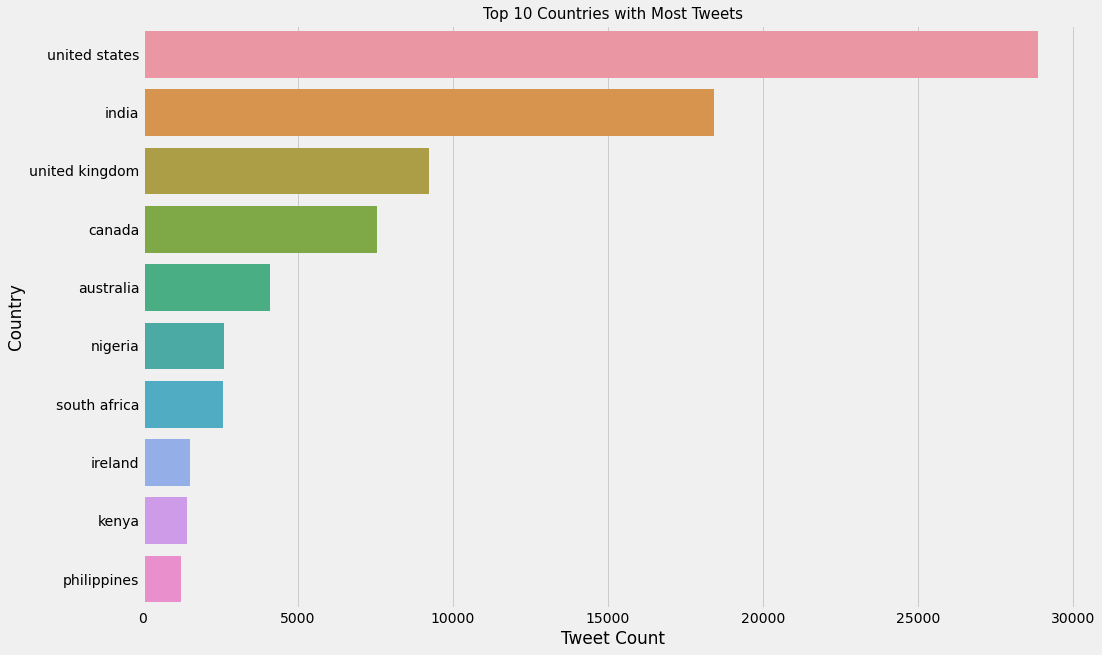

In [12]:
tweet_per_country = covid_tweets_data['country'].str.lower().dropna()
tw = tweet_per_country.value_counts().rename_axis('Country').reset_index(name='Tweet Count')
print(tw)
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Top 10 Countries with Most Tweets',fontsize=15)
sns.set_palette("husl")
ax = sns.barplot(y=tw['Country'].head(10),x=tw['Tweet Count'].head(10))

## **<a id="7">10 Countries with Least Tweets</a>**

                   Country  Tweet Count
0            united states        28875
1                    india        18430
2           united kingdom         9239
3                   canada         7566
4                australia         4115
..                     ...          ...
188              lithuania            1
189           cook islands            1
190  sao tome and principe            1
191           bahamas, the            1
192                eritrea            1

[193 rows x 2 columns]


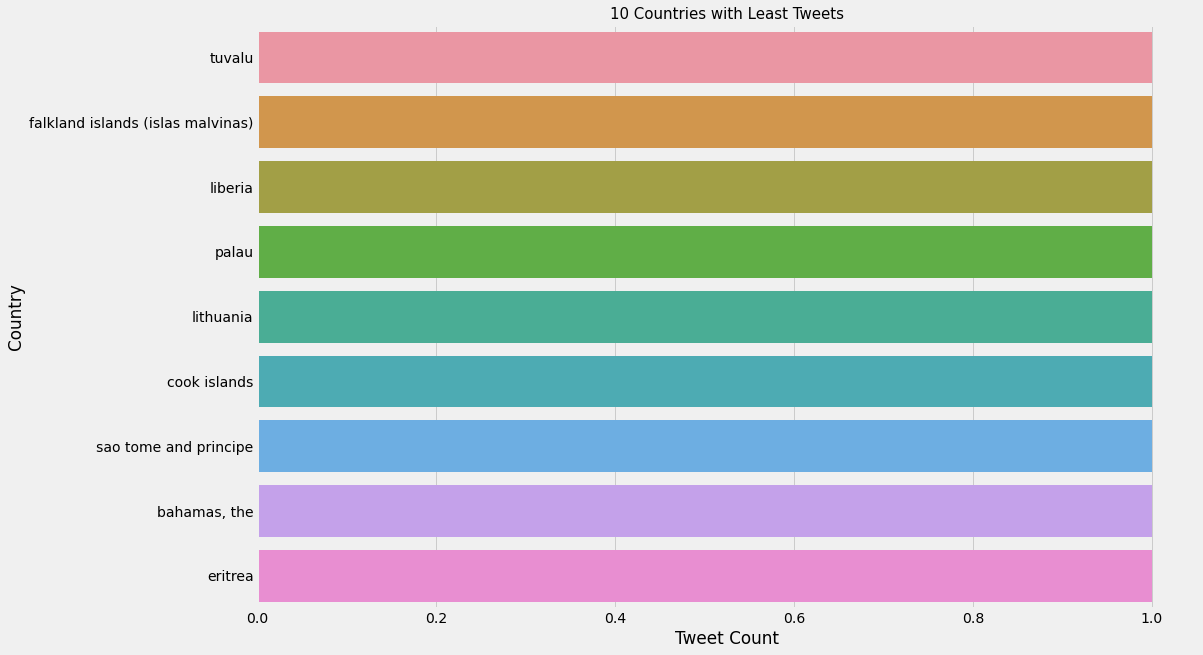

In [13]:
tweet_per_country = covid_tweets_data['country'].str.lower().dropna()
tw = tweet_per_country.value_counts().rename_axis('Country').reset_index(name='Tweet Count')
print(tw)
plt.rcParams['figure.figsize'] = (15,10)
plt.title('10 Countries with Least Tweets',fontsize=15)
sns.set_palette("husl")
ax = sns.barplot(y=tw['Country'][-9:],x=tw['Tweet Count'][-9:])

**Min and Max Dates Between The Dataset**

In [14]:
print (covid_tweets_data["date"].min())
print (covid_tweets_data["date"].max())

2020-07-24 23:47:08
2020-08-30 09:07:39


## **<a id="8">Top 15 Countries with Most Tweets Diffrent Representation</a>**

In [15]:
country_graph_03=px.bar(x='Tweet Count',y='Country',data_frame=tw[:15],color='Country')
country_graph_03.show()

## **<a id="9">Geo-MAP</a>**

In [16]:
geolocator = Nominatim(user_agent="covid19-application")

In [17]:
def visualize_Global_Corona_map(df,  zoom):
    
    lat_map=30.038557
    lon_map=31.231781
    f = folium.Figure(width=1000, height=500)
    m = folium.Map([lat_map,lon_map], zoom_start=zoom).add_to(f)
    print(df["Country"])
    for i in range(0,len(df)):
        t_country=str(df["Country"][i])
        location = geolocator.geocode(t_country)
        popup_text='<i>Location:'+t_country+', Tweets: '+str(df["Tweet Count"][i])+'</i>'
        folium.Marker(location=[location.latitude,location.longitude],popup=popup_text,icon=folium.Icon(icon_color='white',icon ='virus',prefix='fa')).add_to(m)
    
    return m

In [18]:
visualize_Global_Corona_map(tw, 1)

0              united states
1                      india
2             united kingdom
3                     canada
4                  australia
               ...          
188                lithuania
189             cook islands
190    sao tome and principe
191             bahamas, the
192                  eritrea
Name: Country, Length: 193, dtype: object


# Conclusion <a id="10"></a>
This concludes your Geographical Deep analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling! For More Follow me or Give me a Star or contact me now at [Safdar Khan](https://www.safdarhan.ml) or [clikc Here to email me](mailto:safdarkhanofficial@gmail.com).